In [89]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [90]:
import numpy as np
import pandas as pd
import datetime as dt
import sqlite3

# Reflect Tables into SQLAlchemy ORM

In [91]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [92]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [93]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [94]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [95]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [96]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [97]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
cutoff_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= cutoff_date).all()
prcp



[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [99]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [100]:
prcp_df = pd.DataFrame(prcp, columns=['date', 'precipitation'])
prcp_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [106]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

#prcp_df = pd.DataFrame({"date": dates, "prcp": precip})
#prcp_df


# Sort the dataframe by date
prcp_df.sort_values("date")
prcp_df


,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


Text(0, 0.5, 'Inches')

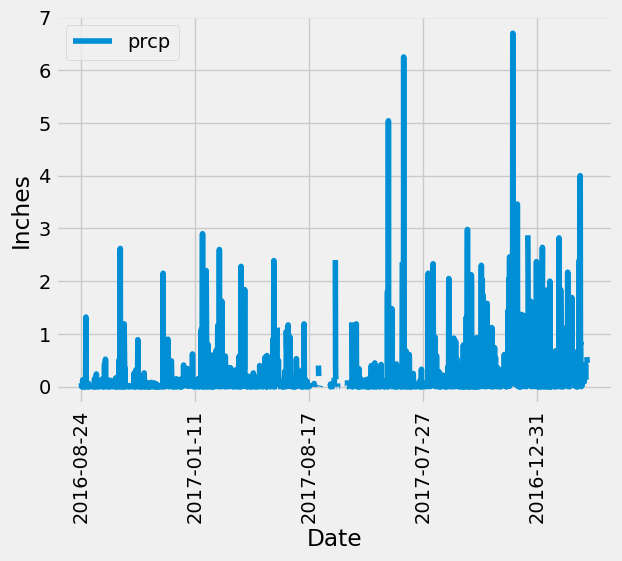

In [107]:
#Sets the column 'date' to be the index.  Sorts the data based off the index.
#prcp_df.set_index('date', inplace = True)
prcp_df.plot(x='date', y='prcp', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [109]:
prcp_df.columns

Index(['date', 'prcp'], dtype='object')

# Exploratory Station Analysis

In [111]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Measurement.station).count()
num_stations

19550

In [112]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [113]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_temps = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
temps_df = pd.DataFrame(most_active_station_temps)
min_temp = temps_df.min()
max_temp = temps_df.max()
avg_temp = temps_df.mean()
print(f"Station USC00519281 min temp: {min_temp}")
print(f"Station USC00519281 max temp: {max_temp}")
print(f"Station USC00519281 avg temp: {avg_temp}")
      

Station USC00519281 min temp: tobs    54.0
dtype: float64
Station USC00519281 max temp: tobs    85.0
dtype: float64
Station USC00519281 avg temp: tobs    71.663781
dtype: float64


In [114]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
cutoff_date_12month = '2016-08-23'
last_12_months_temps = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281') & (Measurement.date > cutoff_date_12month)).all()
last_12_months_temps_df = pd.DataFrame(last_12_months_temps)
last_12_months_temps_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


<Axes: ylabel='Frequency'>

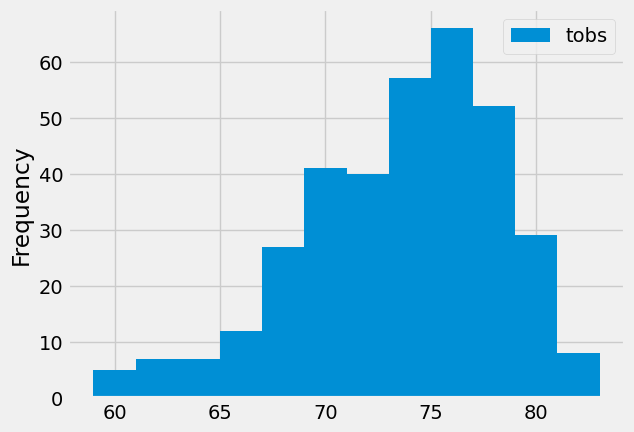

In [115]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_months_temps_df.plot.hist(bins=12)

In [116]:
# Close Session
session.close()